# Chapter 08: Matrix Inverse

## Concepts

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Diagonal matrix multiplied by its inverse is the Identity matrix: True


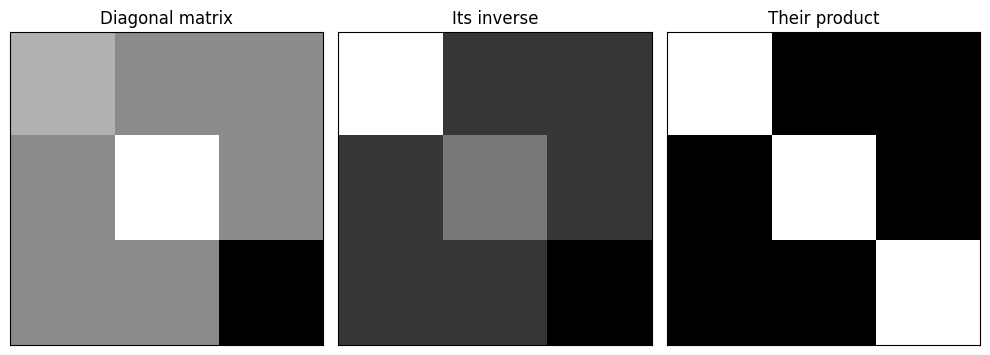

In [91]:
# Inverse of a diagonal matrix

# Generate a random diagonal matrix
diagonal_matrix = np.diag(np.random.randn(3))

# Calculate the inverse of the diagonal matrix
matrix_inverse = np.zeros_like(diagonal_matrix)
for i in range(len(diagonal_matrix)):
    matrix_inverse[i, i] = 1 / diagonal_matrix[i, i]

# Calculate the product of the diagonal matrix and its inverse
matrix_product = diagonal_matrix @ matrix_inverse
identity_matrix = np.eye(3)

# Check if the product is the identity matrix
check = np.allclose(matrix_product, identity_matrix)
print("Diagonal matrix multiplied by its inverse is the Identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['Diagonal matrix', 'Its inverse', 'Their product']
matrices = [diagonal_matrix, matrix_inverse, matrix_product]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Random matrix multiplied by its inverse is the Identity matrix: True


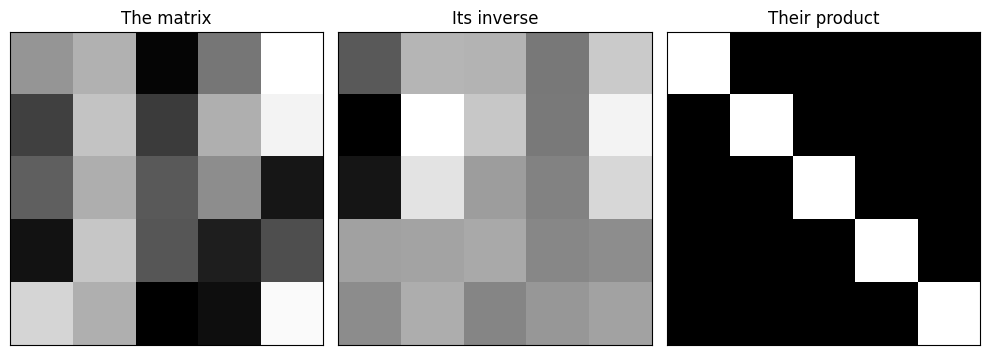

In [93]:
# Full Inverse (using numpy)

# Generate a random matrix
random_matrix = np.random.randn(5, 5)

# Calculate its inverse
matrix_inverse = np.linalg.inv(random_matrix)

# Calculate the product of the matrix and its inverse
matrix_product = random_matrix @ matrix_inverse
identity_matrix = np.eye(5)

# Check if the product is the identity matrix
check = np.allclose(matrix_product, identity_matrix)
print("Random matrix multiplied by its inverse is the Identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['The matrix', 'Its inverse', 'Their product']
matrices = [random_matrix, matrix_inverse, matrix_product]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Full Rank Tall Matrix times its left inverse is equal to the identity matrix: True


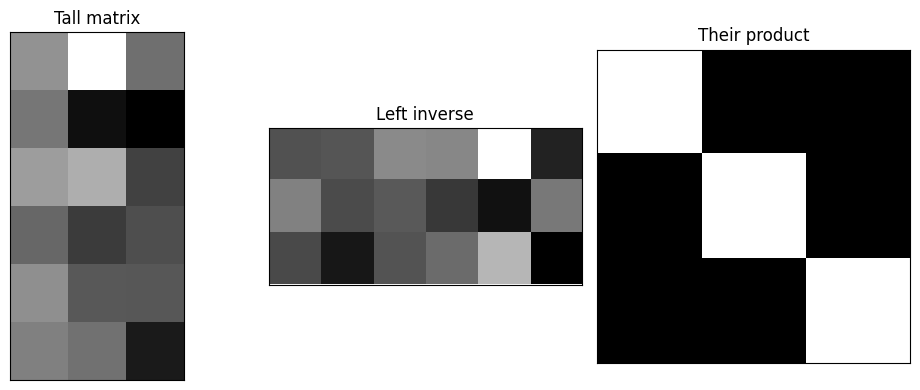

In [94]:
# One-sided inverse (left inverse, using numpy)

# Generate a random tall matrix
tall_matrix = np.random.randn(6, 3)

# Calculate the square matrix and its inverse
square_matrix = tall_matrix.T @ tall_matrix
square_matrix_inverse = np.linalg.inv(square_matrix)

# Calculate the left inverse matrix
left_inverse_matrix = square_matrix_inverse @ tall_matrix.T

# Calculate the product of the left inverse matrix and the tall matrix
matrix_product = left_inverse_matrix @ tall_matrix
identity_matrix = np.eye(3)

# Check if the product is the identity matrix
check = np.allclose(matrix_product, identity_matrix)
print("Full Rank Tall Matrix times its left inverse is equal to the identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['Tall matrix', 'Left inverse', 'Their product']
matrices = [tall_matrix, left_inverse_matrix, matrix_product]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Rank-reduced matrix multiplied by its pseudo-inverse is very close to the Identity matrix: False


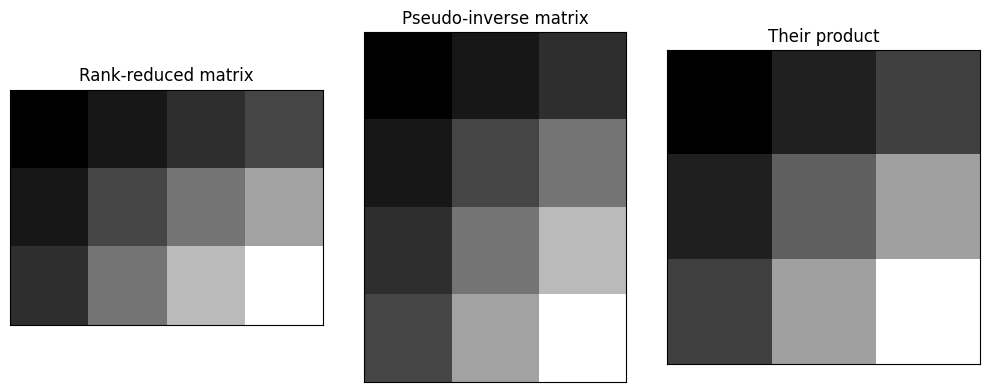

In [98]:
# Psuedoinverse (using numpy)

# Define the rank-reduced matrix
rank_reduced_matrix = np.array([
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 9, 12]
])

# Calculate the pseudo-inverse matrix
pseudo_inverse_matrix = np.linalg.pinv(rank_reduced_matrix)

# Calculate the product of the rank-reduced matrix and its pseudo-inverse
matrix_product = rank_reduced_matrix @ pseudo_inverse_matrix
identity_matrix = np.eye(3)

# Check if the product is close to the identity matrix
check = np.allclose(matrix_product, identity_matrix)
print("Rank-reduced matrix multiplied by its pseudo-inverse is very close to the Identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['Rank-reduced matrix', 'Pseudo-inverse matrix', 'Their product']
matrices = [rank_reduced_matrix, pseudo_inverse_matrix, matrix_product]

# Plot matrices and their titles
for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Code Exercises

In [99]:
# Exercise 8-1 (Inverse of Matrix Inverse)

matrix_a = np.random.randn(5,5)

matrix_inverse = np.linalg.inv(matrix_a)

inverse_matrix_inverse = np.linalg.inv(matrix_inverse)

check = np.allclose(matrix_a, inverse_matrix_inverse)
print("Inverse of matrix inverse is equal to original matrix", check)

Inverse of matrix inverse is equal to original matrix True


The original matrix multiplied by the Adjugate matrix equals the identity matrix: True


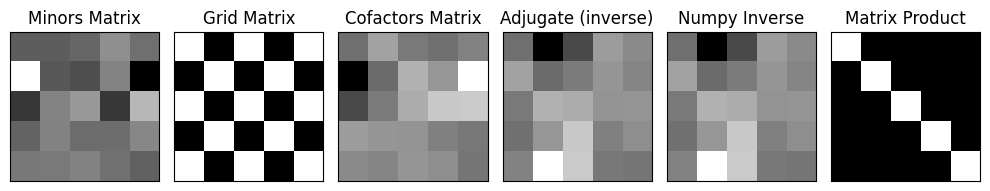

In [114]:
# Exercise 8-2 (Inverting any Square Full-Rank Matrix)

# Create Square Full-Rank Matrix
n = 5
random_matrix = np.random.randn(n,n)

# Compute minors matrix
minors_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        rows = np.arange(n) != i
        cols = np.arange(n) != j
        minors_matrix[i, j] = np.linalg.det(random_matrix[rows][:, cols])

# Compute grid matrix
grid_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        grid_matrix[i, j] = (-1) ** (i + j)

# Compute Cofactors matrix
cofactors_matrix = minors_matrix * grid_matrix

# Compute Adjugate Matrix (Inverse) & Numpy Inverse
adjugate_matrix = cofactors_matrix.T / np.linalg.det(random_matrix)
numpy_inverse = np.linalg.inv(random_matrix)

# Check That original times inverse equals identity
matrix_product = random_matrix @ adjugate_matrix
identity_matrix = np.eye(5)
check = np.allclose(matrix_product, identity_matrix)
print("The original matrix multiplied by the Adjugate matrix equals the identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 6, figsize=(10, 4))
titles = ['Minors Matrix', 'Grid Matrix', 'Cofactors Matrix', 'Adjugate (inverse)', 'Numpy Inverse', 'Matrix Product']
matrices = [minors_matrix, grid_matrix, cofactors_matrix, adjugate_matrix, numpy_inverse, matrix_product]

# Plot matrices and their titles
for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Algorithm for calculating matrix inverse of 2x2 matrix was implemented correctly: True


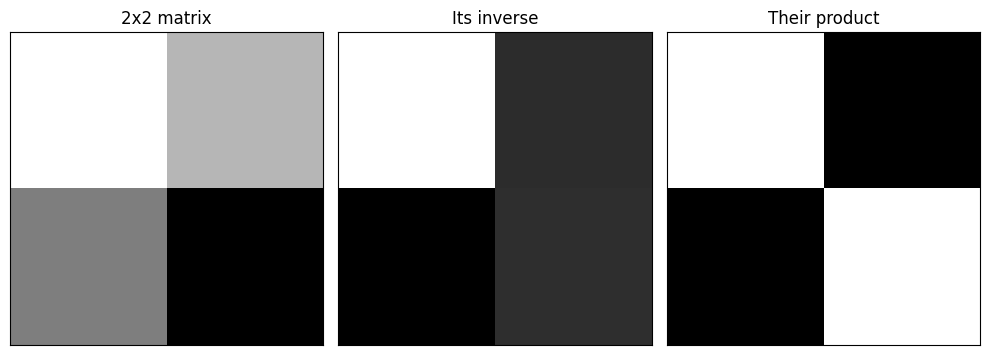

In [115]:
# Exercise 8-3 (Full-inverse algorithm)

# Generate a random 2x2 matrix
two_by_two_matrix = np.random.randn(2, 2)

# Swap the diagonal elements
swapped_matrix = two_by_two_matrix.copy()
swapped_matrix[0, 0], swapped_matrix[1, 1] = swapped_matrix[1, 1], swapped_matrix[0, 0]

# Flip the signs of off-diagonal elements
flipped_sign_matrix = swapped_matrix.copy()
flipped_sign_matrix[0, 1] *= -1
flipped_sign_matrix[1, 0] *= -1

# Calculate the inverse of the matrix
matrix_inverse = flipped_sign_matrix / np.linalg.det(flipped_sign_matrix)

# Check if the algorithm for calculating matrix inverse of 2x2 matrix was implemented correctly
matrix_product = two_by_two_matrix @ matrix_inverse
identity_matrix = np.eye(2)
check = np.allclose(matrix_product, identity_matrix)
print("Algorithm for calculating matrix inverse of 2x2 matrix was implemented correctly:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['2x2 matrix', 'Its inverse', 'Their product']
matrices = [two_by_two_matrix, matrix_inverse, matrix_product]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

Full Rank Tall Matrix times its left inverse is equal to the identity matrix: True


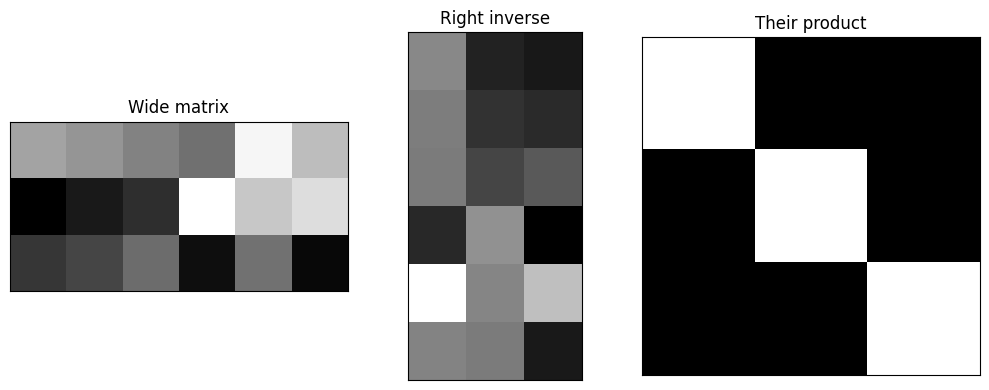

In [124]:
# Exercise 8-4 (Derive right-inverse for wide matrix)

# Generate a random wide matrix
wide_matrix = np.random.randn(3, 6)

# Calculate the square matrix and its inverse
square_matrix = wide_matrix @ wide_matrix.T
square_matrix_inverse = np.linalg.inv(square_matrix)

# Calculate the right inverse matrix
right_inverse_matrix = wide_matrix.T @ square_matrix_inverse

# Calculate the product of the right inverse matrix and the wide matrix
matrix_product = wide_matrix @ right_inverse_matrix
identity_matrix = np.eye(3)

# Check if the product is the identity matrix
check = np.allclose(matrix_product, identity_matrix)
print("Full Rank Tall Matrix times its left inverse is equal to the identity matrix:", check)

# Create plot
fig, axis = plt.subplots(1, 3, figsize=(10, 4))
titles = ['Wide matrix', 'Right inverse', 'Their product']
matrices = [wide_matrix, right_inverse_matrix, matrix_product]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [127]:
# Exercise 8-5 (Show that Psuedoinverse equals inverse for invertible matrices)

# "Full" Inverse case
random_square_matrix = np.random.randn(5,5)
square_matrix_inverse = np.linalg.inv(random_square_matrix)
square_matrix_pseudo_inverse = np.linalg.pinv(random_square_matrix)

check = np.allclose(square_matrix_inverse, square_matrix_pseudo_inverse)
print("Inverse is equal to pseudo-inverse for square matrix:", check)


# Left Inverse case
random_tall_matrix = np.random.randn(5,5)
tall_matrix_left_inverse = np.linalg.inv(random_tall_matrix.T @ random_tall_matrix) @ random_tall_matrix.T
tall_matrix_pseudo_inverse = np.linalg.pinv(random_tall_matrix)

check = np.allclose(tall_matrix_left_inverse, tall_matrix_pseudo_inverse)
print("Left inverse is equal to pseudo-inverse for tall matrix:", check)


# Right Inverse case
random_wide_matrix = np.random.randn(5,5)
wide_matrix_right_inverse = random_wide_matrix.T @ np.linalg.inv(random_wide_matrix @ random_wide_matrix.T)
wide_matrix_pseudo_inverse = np.linalg.pinv(random_wide_matrix)

check = np.allclose(wide_matrix_right_inverse, wide_matrix_pseudo_inverse)
print("Right inverse is equal to pseudo-inverse for wide matrix:", check)

Inverse is equal to pseudo-inverse for square matrix: True
Left inverse is equal to pseudo-inverse for tall matrix: True
Right inverse is equal to pseudo-inverse for wide matrix: True


In [ ]:
# Exercise 8-6 (EDIT TIDE applied to inverse of multiplied matrices)

In [ ]:
# Exercise 8-7 (EDIT TIDE & one sided inverse)

In [ ]:
# Exercise 8-8 (Matrix inverse geometric transformation)

In [ ]:
# Exercise 8-9 (Hilbert matrix inverse)

In [ ]:
# Exercise 8-10 (Distance of inverse to identity matrix as Hilbert matrix grows)